#  KNN ( K En Yakın Komşu)  Algoritması Uygulaması

In [1]:
library(class)
library(readr)
library(ggplot2)
library(purrr)
library(dplyr)
library(caret)
library(AppliedPredictiveModeling)
library(tidyverse)
library(ISLR)
library(funModeling)
library(Matrix) 
library(kernlab) 
library(PerformanceAnalytics)
library(FNN)
library(e1071)
library(Hmisc)
library(rpart) 
library(pgmm) 
library(dslabs)
library(rpart.plot) 
library(partykit) 
library(ipred) 
library(randomForest)
library(gbm)
library(nnet)
library(neuralnet)
library(GGally)
library(NeuralNetTools) 
library(AppliedPredictiveModeling)
library(pls) 
library(elasticnet)
library(broom)
library(shiny)
library(caTools)
library(lattice)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

<U+221A> tibble  3.0.4     <U+221A> stringr 1.4.0
<U+221A> tidyr   1.1.2     <U+221A> forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x caret::lift()   masks purrr::lift()

Loading required package: Hmisc

Loading required package: survival


Attaching package: 'survival'


The following object is masked from 'package:caret':

    cluster


Loading required package: Formula


Att

**Universal Bank Data Setini yüklüyoruz.**

In [2]:
setwd("C:/Users/eceti/Desktop")

df<- read_csv("UniversalBank.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  ID = col_double(),
  Age = col_double(),
  Experience = col_double(),
  Income = col_double(),
  `ZIP Code` = col_double(),
  Family = col_double(),
  CCAvg = col_double(),
  Education = col_double(),
  Mortgage = col_double(),
  `Personal Loan` = col_double(),
  `Securities Account` = col_double(),
  `CD Account` = col_double(),
  Online = col_double(),
  CreditCard = col_double()
)




# Veriyi Tanıtımı

In [3]:
colnames(df)  # Verinin Etiketleri

str(df)

[1] "ID"                 "Age"                "Experience"        
 [4] "Income"             "ZIP Code"           "Family"            
 [7] "CCAvg"              "Education"          "Mortgage"          
[10] "Personal Loan"      "Securities Account" "CD Account"        
[13] "Online"             "CreditCard"

tibble [5,000 x 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID                : num [1:5000] 1 2 3 4 5 6 7 8 9 10 ...
 $ Age               : num [1:5000] 25 45 39 35 35 37 53 50 35 34 ...
 $ Experience        : num [1:5000] 1 19 15 9 8 13 27 24 10 9 ...
 $ Income            : num [1:5000] 49 34 11 100 45 29 72 22 81 180 ...
 $ ZIP Code          : num [1:5000] 91107 90089 94720 94112 91330 ...
 $ Family            : num [1:5000] 4 3 1 1 4 4 2 1 3 1 ...
 $ CCAvg             : num [1:5000] 1.6 1.5 1 2.7 1 0.4 1.5 0.3 0.6 8.9 ...
 $ Education         : num [1:5000] 1 1 1 2 2 2 2 3 2 3 ...
 $ Mortgage          : num [1:5000] 0 0 0 0 0 155 0 0 104 0 ...
 $ Personal Loan     : num [1:5000] 0 0 0 0 0 0 0 0 0 1 ...
 $ Securities Account: num [1:5000] 1 1 0 0 0 0 0 0 0 0 ...
 $ CD Account        : num [1:5000] 0 0 0 0 0 0 0 0 0 0 ...
 $ Online            : num [1:5000] 0 0 0 0 0 1 1 0 1 0 ...
 $ CreditCard        : num [1:5000] 0 0 0 0 1 0 0 1 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   ID 

In [4]:
colSums(is.na(df)) # Veride eksik değer var mı ?

ID                Age         Experience             Income 
                 0                  0                  0                  0 
          ZIP Code             Family              CCAvg          Education 
                 0                  0                  0                  0 
          Mortgage      Personal Loan Securities Account         CD Account 
                 0                  0                  0                  0 
            Online         CreditCard 
                 0                  0

In [5]:
names(df)[names(df) == "Personal Loan"] <- "Personal_Loan"
names(df)[names(df) == "Securities Account"] <- "Securities_Account" 
names(df)[names(df) == "CD Account"] <- "CD_Account"

**Modelde kullanılacak değişkenleri orjinal dataframeden çekip yeni bir dataframe oluşturuyoruz.**

In [6]:
df_subset <- df[c("Personal_Loan","Age","Experience","Income","Family","Mortgage","CCAvg","CD_Account","Education","CreditCard","Securities_Account")]

**Tahmin edeceğimiz bağımlı değişken olan Personal_Loan'ı factor formatına dönüştürüyoruz.**

In [7]:
df_subset$Personal_Loan<-factor(df_subset$Personal_Loan,levels=unique(df_subset$Personal_Loan),labels = seq(0, 1)) # 

In [8]:
glimpse(df_subset)    # veri setine genel bakış

head(df_subset)      # Verinin ilk satırları   

summary(df_subset)  # Verinin istatistiksel özellikleri

Rows: 5,000
Columns: 11
$ Personal_Loan      <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
$ Age                <dbl> 25, 45, 39, 35, 35, 37, 53, 50, 35, 34, 65, 29, ...
$ Experience         <dbl> 1, 19, 15, 9, 8, 13, 27, 24, 10, 9, 39, 5, 23, 3...
$ Income             <dbl> 49, 34, 11, 100, 45, 29, 72, 22, 81, 180, 105, 4...
$ Family             <dbl> 4, 3, 1, 1, 4, 4, 2, 1, 3, 1, 4, 3, 2, 4, 1, 1, ...
$ Mortgage           <dbl> 0, 0, 0, 0, 0, 155, 0, 0, 104, 0, 0, 0, 0, 0, 0,...
$ CCAvg              <dbl> 1.6, 1.5, 1.0, 2.7, 1.0, 0.4, 1.5, 0.3, 0.6, 8.9...
$ CD_Account         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ Education          <dbl> 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 1, 3, ...
$ CreditCard         <dbl> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...
$ Securities_Account <dbl> 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...


Personal_Loan,Age,Experience,Income,Family,Mortgage,CCAvg,CD_Account,Education,CreditCard,Securities_Account
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,25,1,49,4,0,1.6,0,1,0,1
0,45,19,34,3,0,1.5,0,1,0,1
0,39,15,11,1,0,1.0,0,1,0,0
0,35,9,100,1,0,2.7,0,2,0,0
0,35,8,45,4,0,1.0,0,2,1,0
0,37,13,29,4,155,0.4,0,2,0,0


 Personal_Loan      Age          Experience       Income           Family     
 0:4520        Min.   :23.00   Min.   :-3.0   Min.   :  8.00   Min.   :1.000  
 1: 480        1st Qu.:35.00   1st Qu.:10.0   1st Qu.: 39.00   1st Qu.:1.000  
               Median :45.00   Median :20.0   Median : 64.00   Median :2.000  
               Mean   :45.34   Mean   :20.1   Mean   : 73.77   Mean   :2.396  
               3rd Qu.:55.00   3rd Qu.:30.0   3rd Qu.: 98.00   3rd Qu.:3.000  
               Max.   :67.00   Max.   :43.0   Max.   :224.00   Max.   :4.000  
    Mortgage         CCAvg          CD_Account       Education    
 Min.   :  0.0   Min.   : 0.000   Min.   :0.0000   Min.   :1.000  
 1st Qu.:  0.0   1st Qu.: 0.700   1st Qu.:0.0000   1st Qu.:1.000  
 Median :  0.0   Median : 1.500   Median :0.0000   Median :2.000  
 Mean   : 56.5   Mean   : 1.938   Mean   :0.0604   Mean   :1.881  
 3rd Qu.:101.0   3rd Qu.: 2.500   3rd Qu.:0.0000   3rd Qu.:3.000  
 Max.   :635.0   Max.   :10.000   Max.   :1.0

# Verinin Görselleştirilmesi

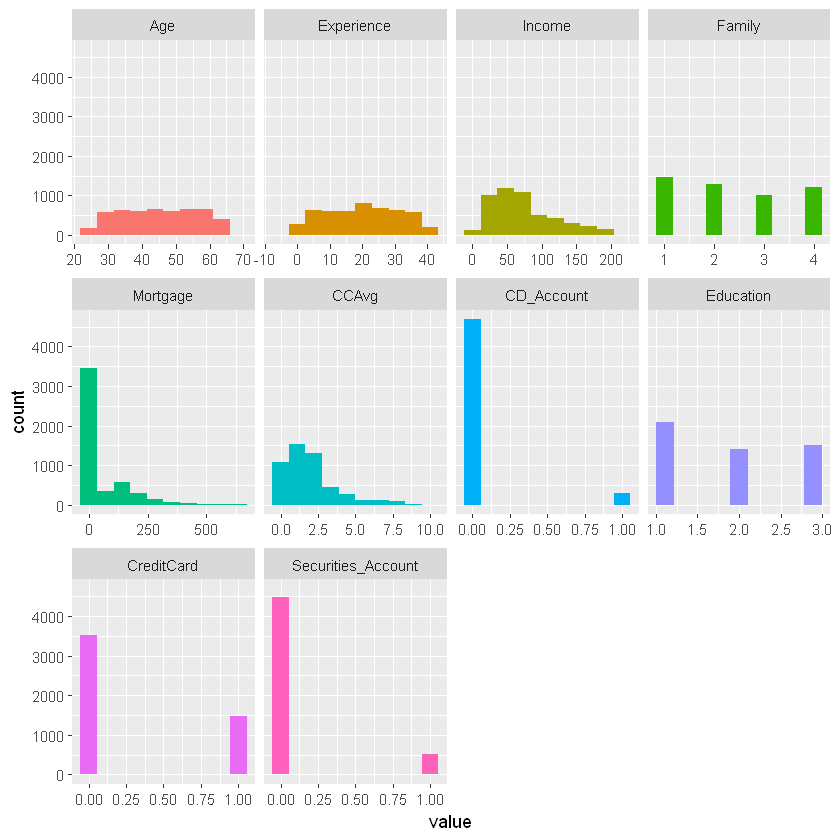

In [9]:
plot_num(df_subset)  # numerik değişkenlerin görselleştirilmesi



Personal_Loan,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
0,4520,90.4,90.4
1,480,9.6,100.0


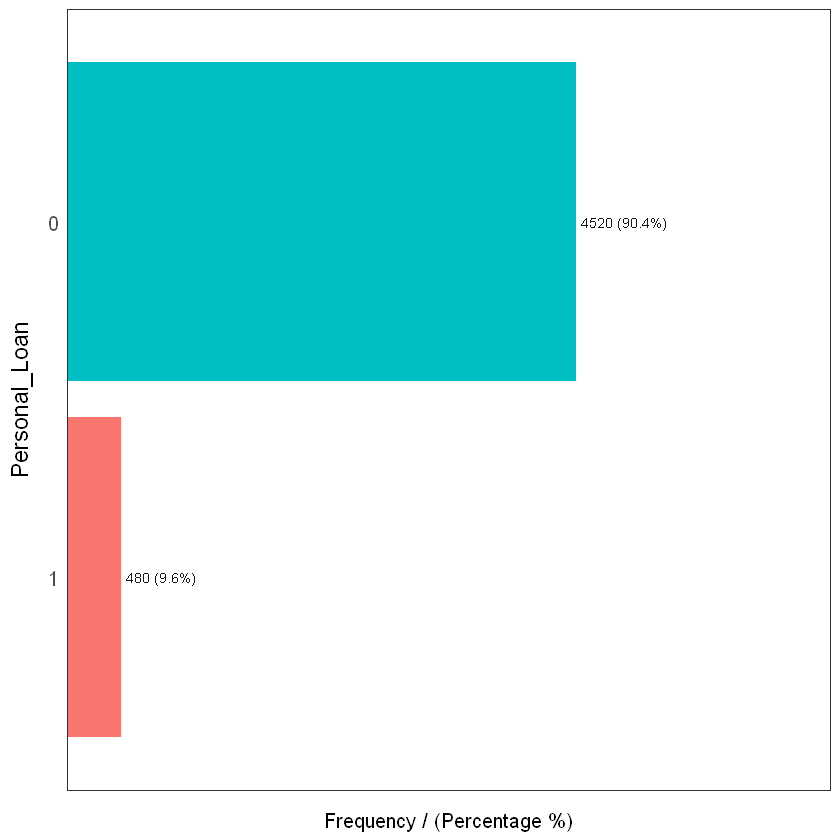

In [10]:
freq(df_subset)  # kategorik değişkenlerin görselleştirilmesi


# Veri setini Train ve  Test olarak bölüyoruz.



In [11]:
set.seed(13)


train_index<-createDataPartition(df_subset$Personal_Loan, p=0.7,list=FALSE,times=1)  #caret

train<-df_subset[train_index,]
test<-df_subset[-train_index,]


              
train_x<-train %>% dplyr::select(-Personal_Loan)
train_y<-train$Personal_Loan

test_x<- test %>%  dplyr::select(-Personal_Loan)
test_y<- test$Personal_Loan

training<-data.frame(train_x,Personal_Loan<-train_y) #yedekleme

Warning message:
"The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


**KNN için model oluşturuyoruz.**

In [12]:

knn_train<-train
knn_test<-test

knn_train<-knn_train %>% select(-Personal_Loan)
knn_test<-knn_test %>% select(-Personal_Loan)

knn_fit<- knn(train=knn_train,test=knn_test, cl=train_y, k= 10)  #library(FNN)

# Modelin Tutarlılığının kontrolü ve Confusion Matrix

In [13]:
confusionMatrix(table(knn_fit ,test_y))

Confusion Matrix and Statistics

       test_y
knn_fit    0    1
      0 1330  113
      1   26   31
                                          
               Accuracy : 0.9073          
                 95% CI : (0.8915, 0.9215)
    No Information Rate : 0.904           
    P-Value [Acc > NIR] : 0.3503          
                                          
                  Kappa : 0.2686          
                                          
 Mcnemar's Test P-Value : 2.999e-13       
                                          
            Sensitivity : 0.9808          
            Specificity : 0.2153          
         Pos Pred Value : 0.9217          
         Neg Pred Value : 0.5439          
             Prevalence : 0.9040          
         Detection Rate : 0.8867          
   Detection Prevalence : 0.9620          
      Balanced Accuracy : 0.5981          
                                          
       'Positive' Class : 0               
                                       

# Model Tuning

5-nearest neighbor model
Training set outcome distribution:

   0    1 
3164  336 


,k
,<int>
1,5


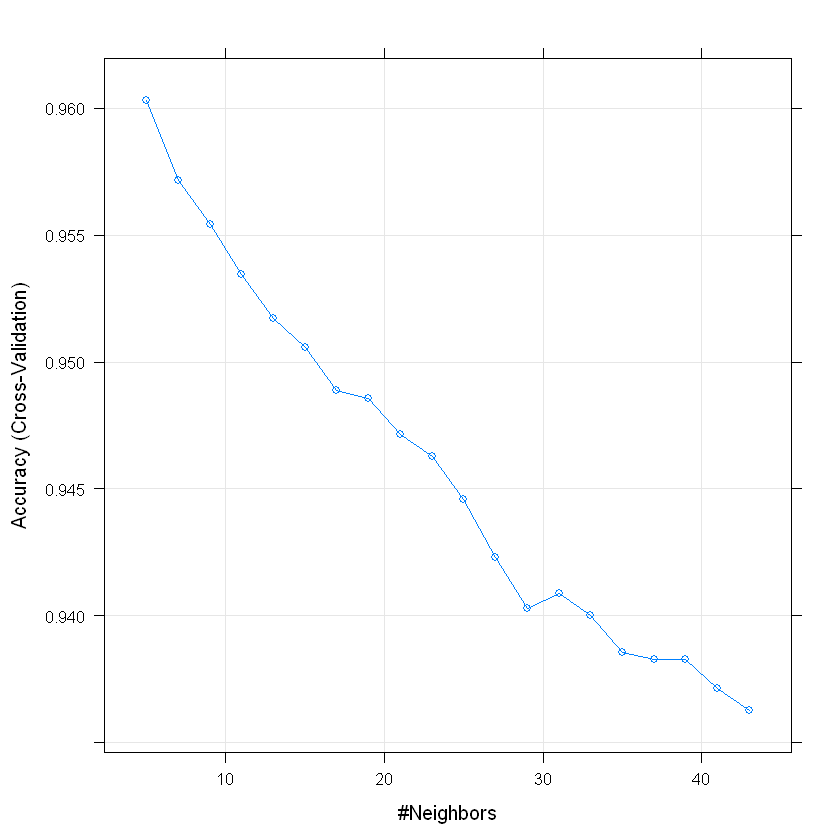

In [14]:

set.seed(123)

KNN__TUNE <- train(
  Personal_Loan ~., data = train, method = "knn",
  trControl = trainControl("cv", number = 10),
  preProcess = c("center","scale"),
  tuneLength = 20
  )

# Plot model accuracy vs k nın farklı değerleri

plot(KNN__TUNE )
KNN__TUNE$finalModel
KNN__TUNE$bestTune